In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('definitive_dataset.csv', low_memory=False)

In [ ]:
df['genres'] = df['genres'].apply(json.loads)
df['production_companies'] = df['production_companies'].apply(json.loads)

In [ ]:
df_exploded = df.explode('genres')

In [ ]:
df_exploded['runtime'] = pd.to_numeric(df_exploded['runtime'], errors='coerce')
df_exploded['imdb'] = pd.to_numeric(df_exploded['imdb'], errors='coerce')
df_exploded['revenue'] = pd.to_numeric(df_exploded['revenue'], errors='coerce')
df_clean = df_exploded.dropna(subset=['genres', 'runtime', 'imdb'])
df_clean = df_clean[df_clean['runtime'].notna() & df_clean['imdb'].notna() & (df_clean['runtime'] > 0)]

excluded_genres = ['Adult', 'Game-Show', 'News', 'Reality-TV', 'Talk-Show', 'Short', 'TV Movie']
df_clean = df_clean[~df_clean['genres'].isin(excluded_genres)]

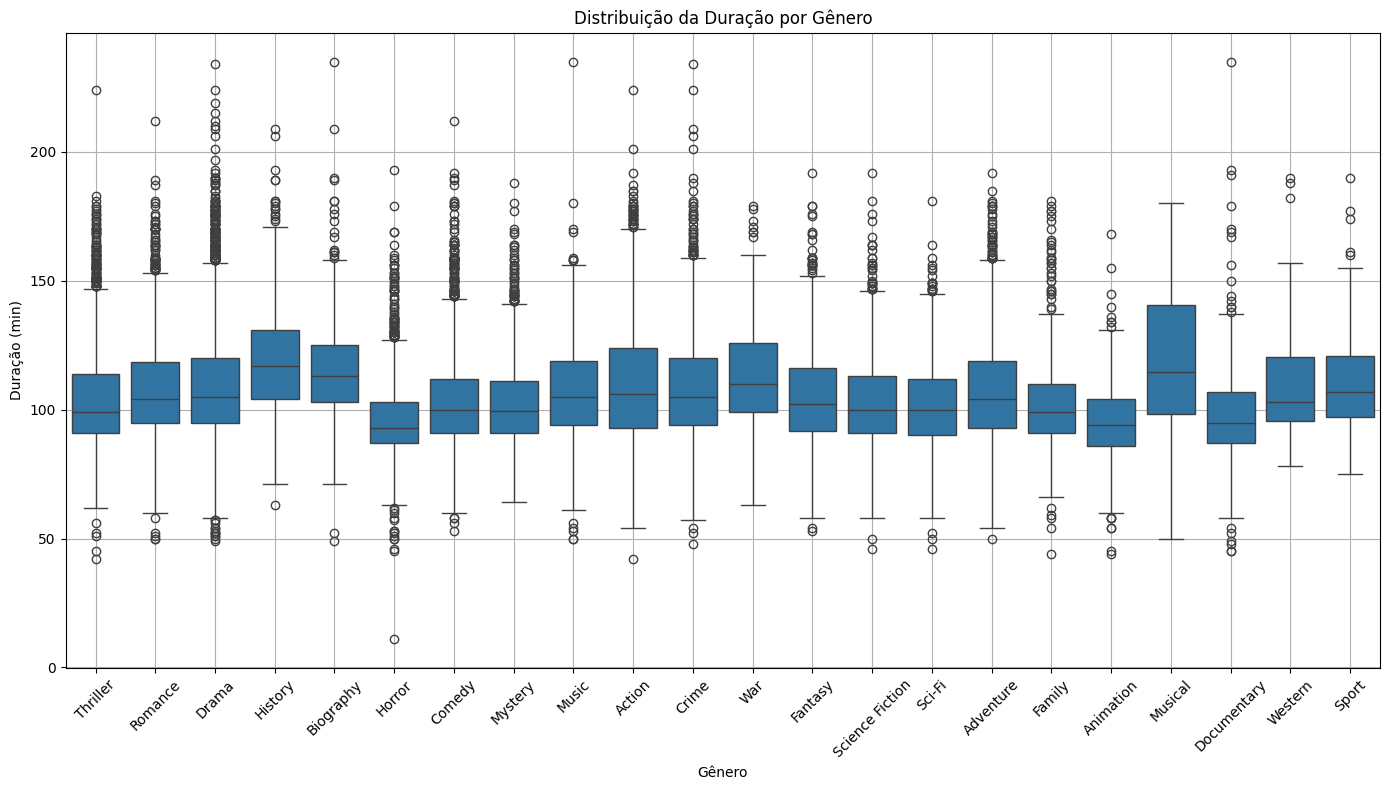

'Horror e Animation apresentam medianas abaixo de 100 min, sugerindo que nesses gêneros o público (ou o próprio ritmo narrativo)\n favorece filmes mais enxutos (~80–95 min).'

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_clean[df_clean['runtime'] < 240], x='genres', y='runtime')
plt.title("Distribuição da Duração por Gênero")
plt.ylabel("Duração (min)")
plt.xlabel("Gênero")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostra onde está a duração mais comum por gênero.
""" Zona de conforto geral: 90–120 min é o intervalo onde a maioria dos gêneros atinge maior concentração de títulos. Os gêneros gêneros 'mainstream'
como Action, Drama, Crime, Adventure, Romance estão aqui"""
# Para Musical/History/Biography, considerar durações de 110–140 min.
# Para Horror/Animation, mirar em 80–95 min.
"""Horror e Animation apresentam medianas abaixo de 100 min, sugerindo que nesses gêneros o público (ou o próprio ritmo narrativo)
 favorece filmes mais enxutos (~80–95 min)."""
#TV Movie também mostra medianas baixas, mas seu número de casos é pequeno.

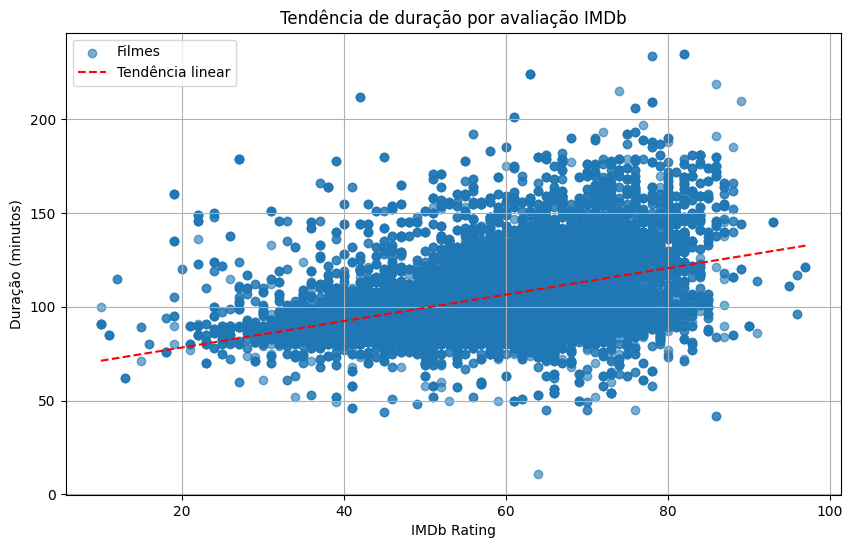

In [ ]:
df_sorted = df_clean.sort_values('imdb')
df_sorted = df_sorted[df_sorted['runtime'] < 240]


# Plotar dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['imdb'], df_sorted['runtime'], alpha=0.6, label='Filmes')

# Adicionar linha de tendência linear
z = np.polyfit(df_sorted['imdb'], df_sorted['runtime'], 1)
p = np.poly1d(z)
plt.plot(df_sorted['imdb'], p(df_sorted['imdb']), "r--", label='Tendência linear')

plt.title('Tendência de duração por avaliação IMDb')
plt.xlabel('IMDb Rating')
plt.ylabel('Duração (minutos)')
plt.legend()
plt.grid(True)
plt.show()

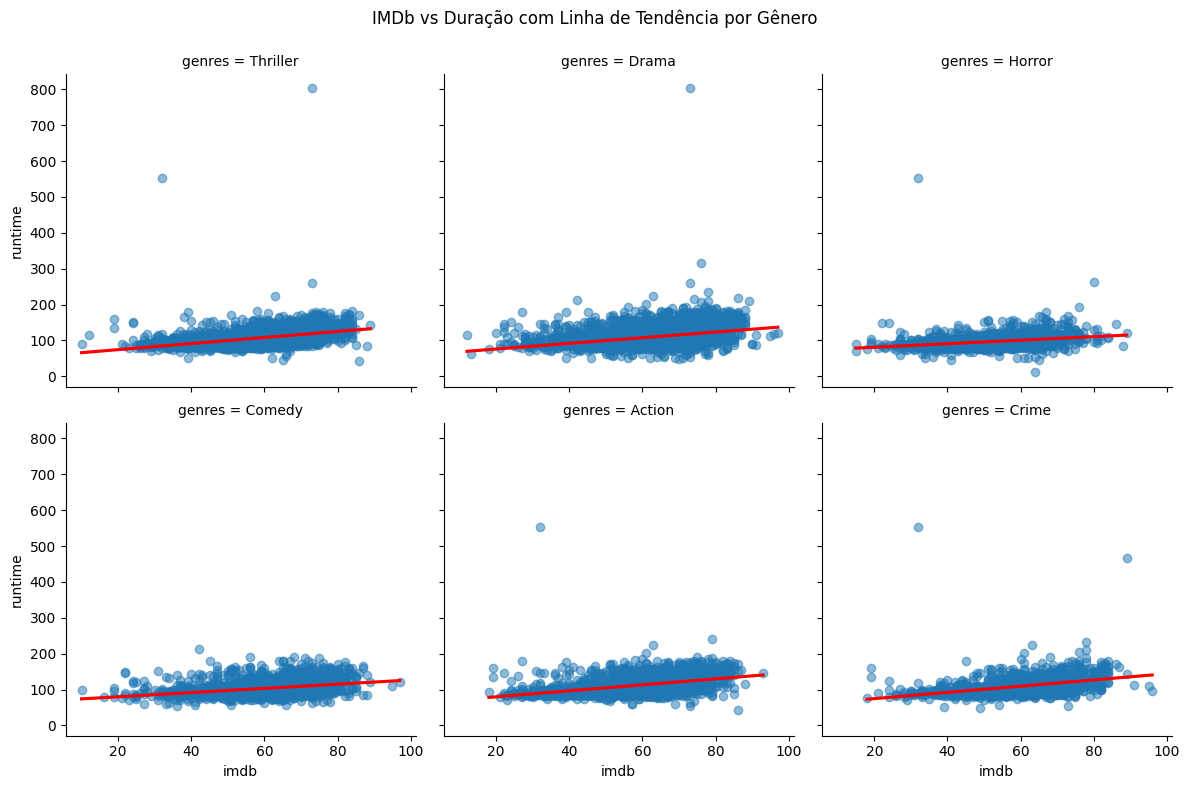

In [ ]:
top_genres = df_clean['genres'].value_counts().head(6).index
df_top = df_clean[df_clean['genres'].isin(top_genres)]

sns.lmplot(
    data=df_top,
    x='imdb',
    y='runtime',
    col='genres',
    col_wrap=3,
    height=4,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
    ci=None
)
plt.subplots_adjust(top=0.9)
plt.suptitle("IMDb vs Duração com Linha de Tendência por Gênero")
plt.show()


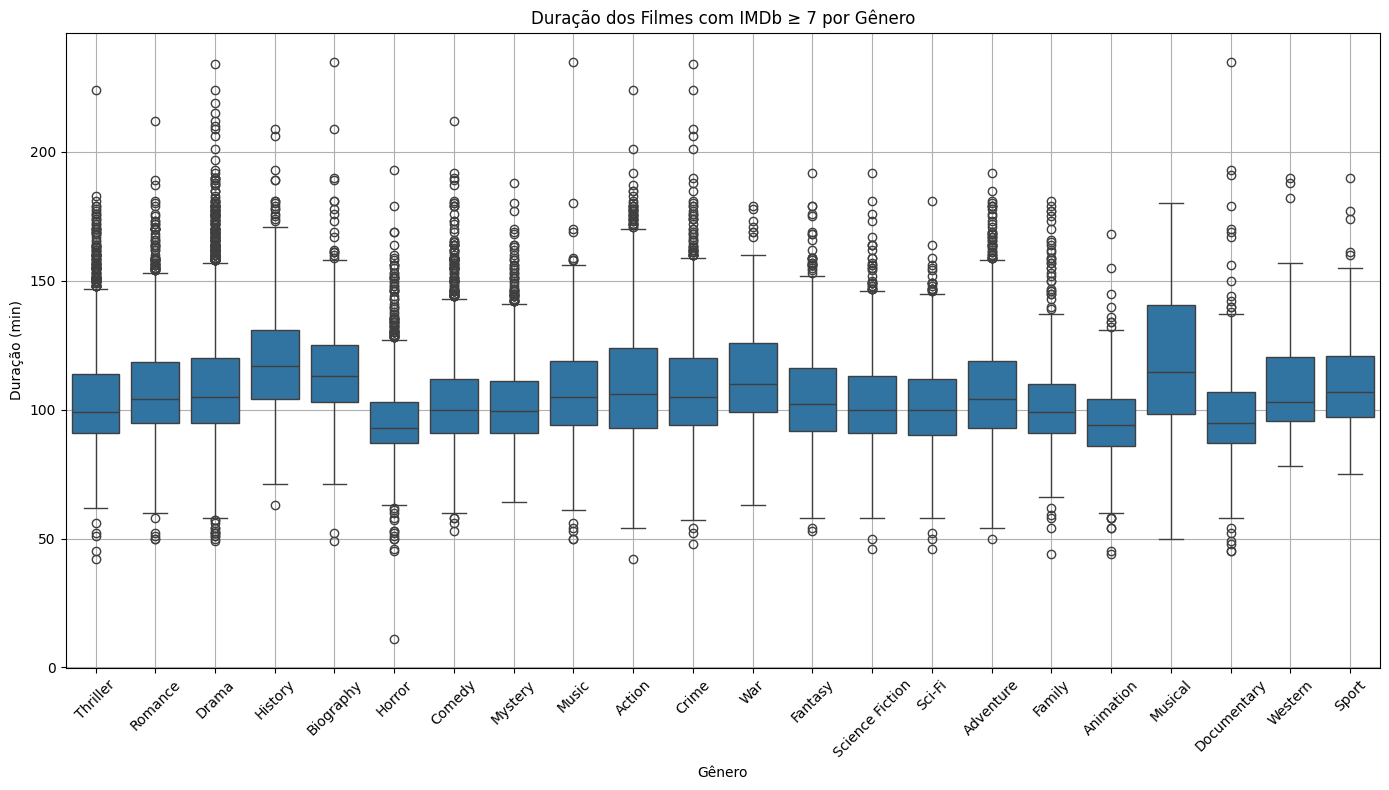

In [ ]:
df_high_rating = df_clean[(df_clean['imdb'] >= 7.0) & (df_clean['runtime'] < 240)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_high_rating, x='genres', y='runtime')
plt.title("Duração dos Filmes com IMDb ≥ 7 por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Duração (min)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
ideal_duration = (
    df_high_rating
    .groupby('genres')['runtime']
    .agg(['mean', 'median', 'count'])
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print(ideal_duration)

                  mean  median  count
genres                               
Musical          130.1   115.0     67
History          119.1   117.0    676
Biography        115.5   113.0    633
War              113.6   110.0    307
Action           111.2   106.0   2083
Sport            110.0   107.0    152
Crime            109.6   105.0   1543
Drama            109.1   105.0   5466
Adventure        108.5   104.0   1249
Western          108.4   103.0    100
Romance          108.1   104.0   1535
Music            108.0   105.0    313
Fantasy          106.6   102.0    840
Thriller         104.6    99.0   2903
Science Fiction  104.2   100.0    760
Comedy           103.4   100.0   2609
Mystery          103.3    99.5   1252
Sci-Fi           102.9   100.0    487
Family           102.4    99.0    603
Documentary      100.9    95.0    414
Horror            96.5    93.0   1725
Animation         95.2    94.0    451
News              87.2    90.0      5
TV Movie          86.7    88.0     71


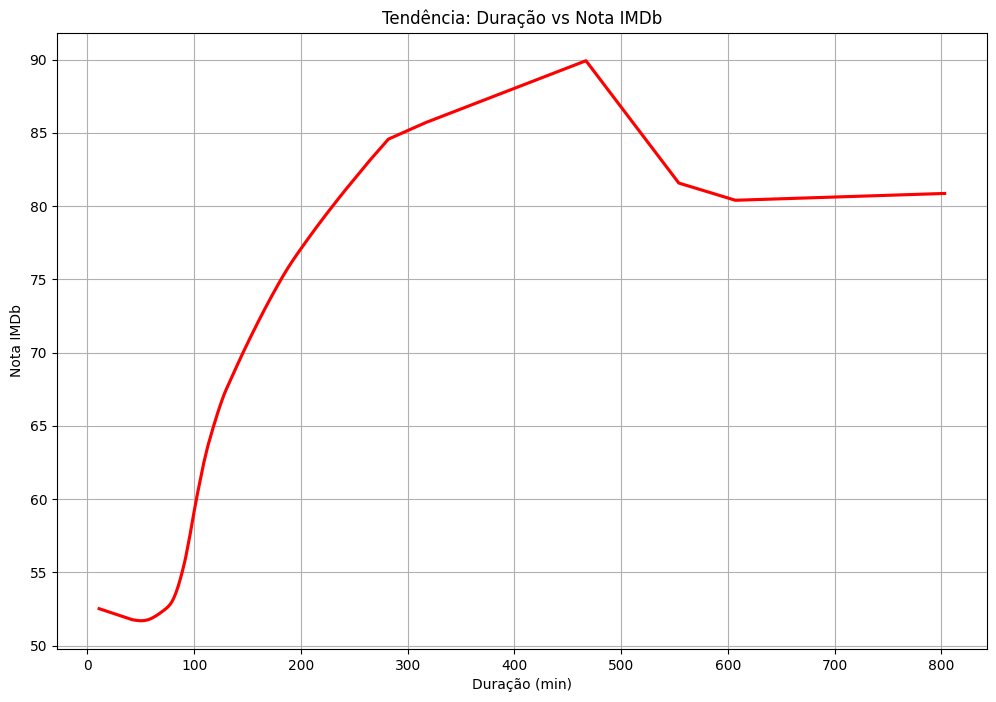

In [ ]:
df_filtered = df_clean[df_clean['runtime'].notna() & df_clean['imdb'].notna() & df_clean['runtime'] < 240]

plt.figure(figsize=(12, 8))
sns.regplot(data=df_filtered, x='runtime', y='imdb', scatter=False, lowess=True, line_kws={'color':'red'})
plt.title("Tendência: Duração vs Nota IMDb")
plt.xlabel("Duração (min)")
plt.ylabel("Nota IMDb")
plt.grid(True)
plt.show()

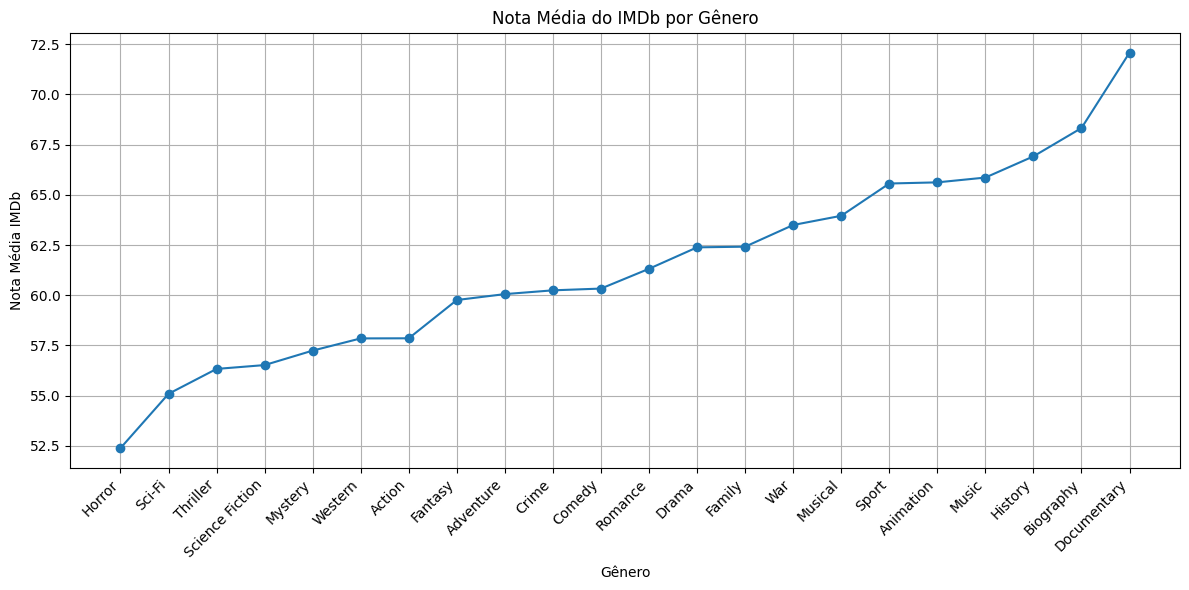

In [ ]:
# Calcular média por gênero
avg_rating_by_genre = (
    df_clean
    .dropna(subset=['imdb'])
    .groupby('genres')['imdb']
    .mean()
    .sort_values()
)

# Criar gráfico com linha + pontos
plt.figure(figsize=(12, 6))
plt.plot(avg_rating_by_genre.index, avg_rating_by_genre.values, marker='o', linestyle='-')
plt.title("Nota Média do IMDb por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Nota Média IMDb")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

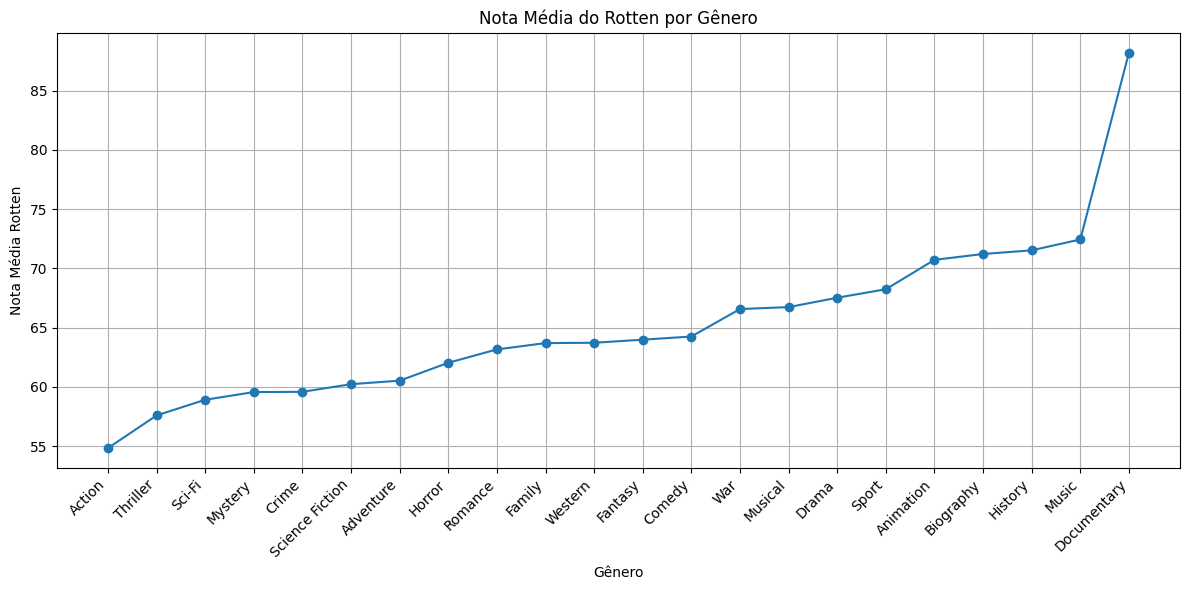

In [ ]:
# Calcular média por gênero
avg_rating_by_genre = (
    df_clean
    .dropna(subset=['rotten'])
    .groupby('genres')['rotten']
    .mean()
    .sort_values()
)

# Criar gráfico com linha + pontos
plt.figure(figsize=(12, 6))
plt.plot(avg_rating_by_genre.index, avg_rating_by_genre.values, marker='o', linestyle='-')
plt.title("Nota Média do Rotten por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Nota Média Rotten")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

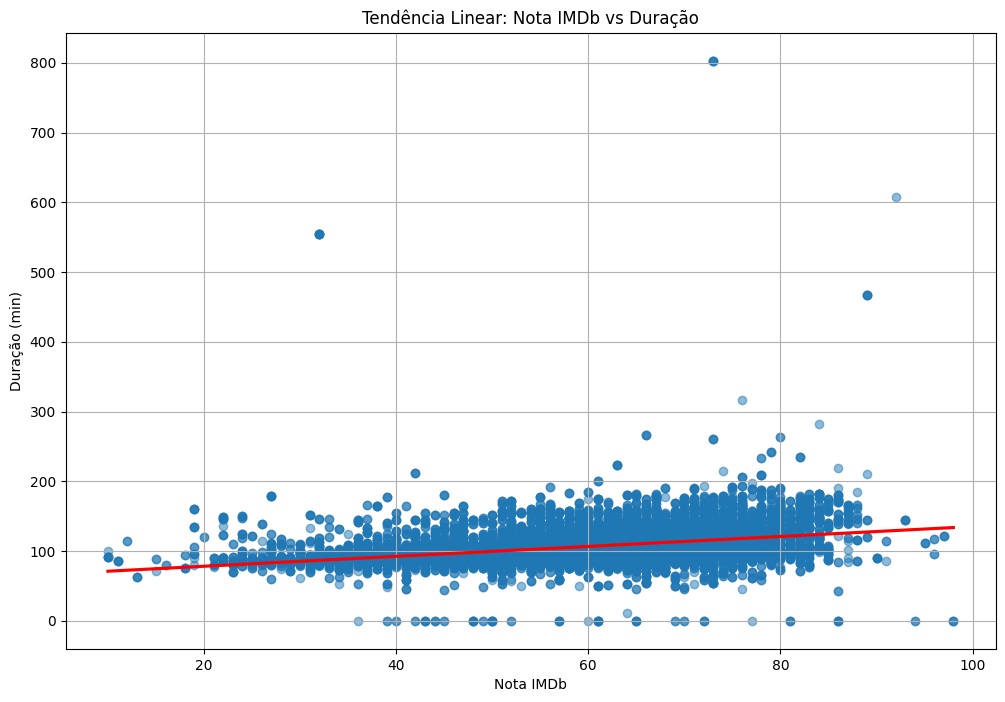

In [ ]:
df_trend = df_clean.dropna(subset=['runtime', 'imdb']).reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.regplot(
    data=df_trend,
    x='imdb',
    y='runtime',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
    ci=None
)
plt.title("Tendência Linear: Nota IMDb vs Duração")
plt.xlabel("Nota IMDb")
plt.ylabel("Duração (min)")
plt.grid(True)
plt.show()

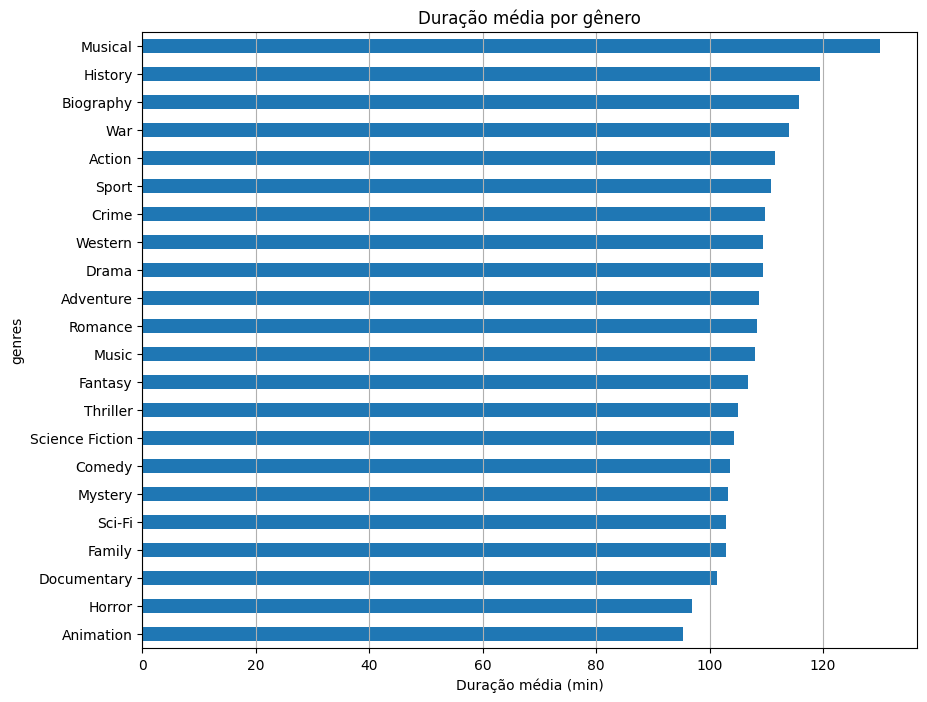

In [ ]:
genre_runtime = df_clean.groupby('genres')['runtime'].mean().sort_values()

genre_runtime.plot(kind='barh', figsize=(10, 8), title="Duração média por gênero")
plt.xlabel("Duração média (min)")
plt.grid(True, axis='x')
plt.show()

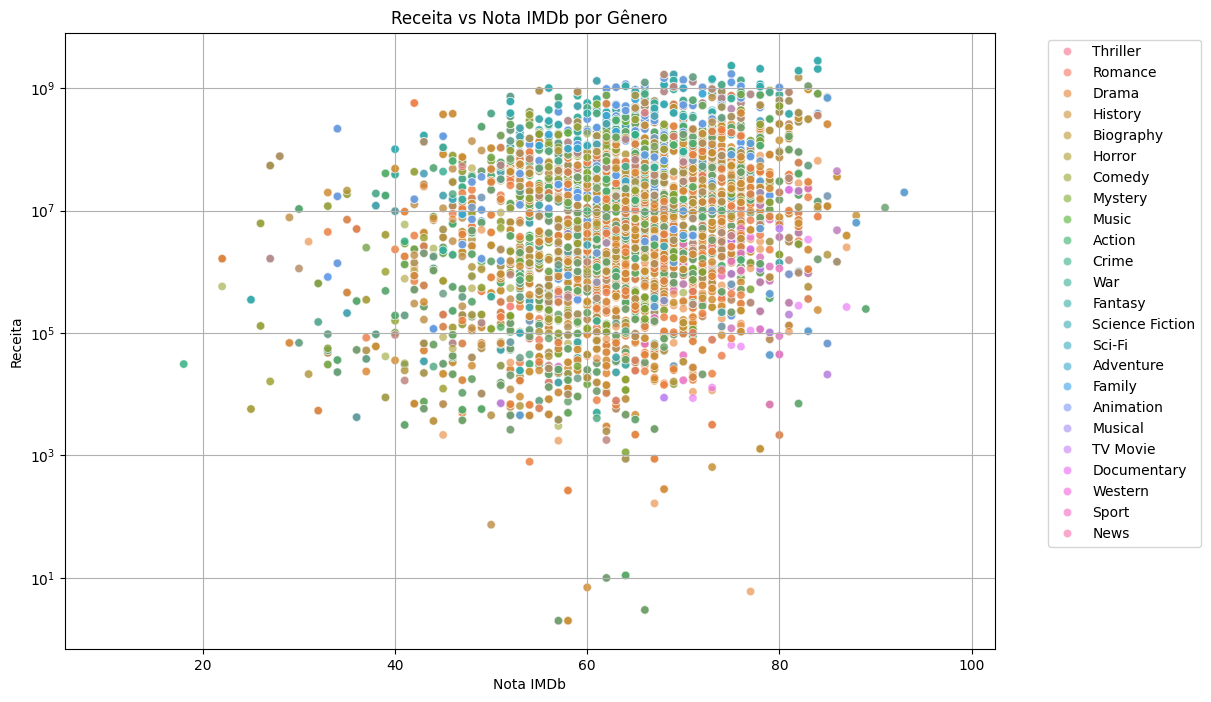

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clean, x='imdb', y='revenue', hue='genres', alpha=0.6)
plt.title("Receita vs Nota IMDb por Gênero")
plt.xlabel("Nota IMDb")
plt.ylabel("Receita")
plt.yscale('log')  # normaliza a escala
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

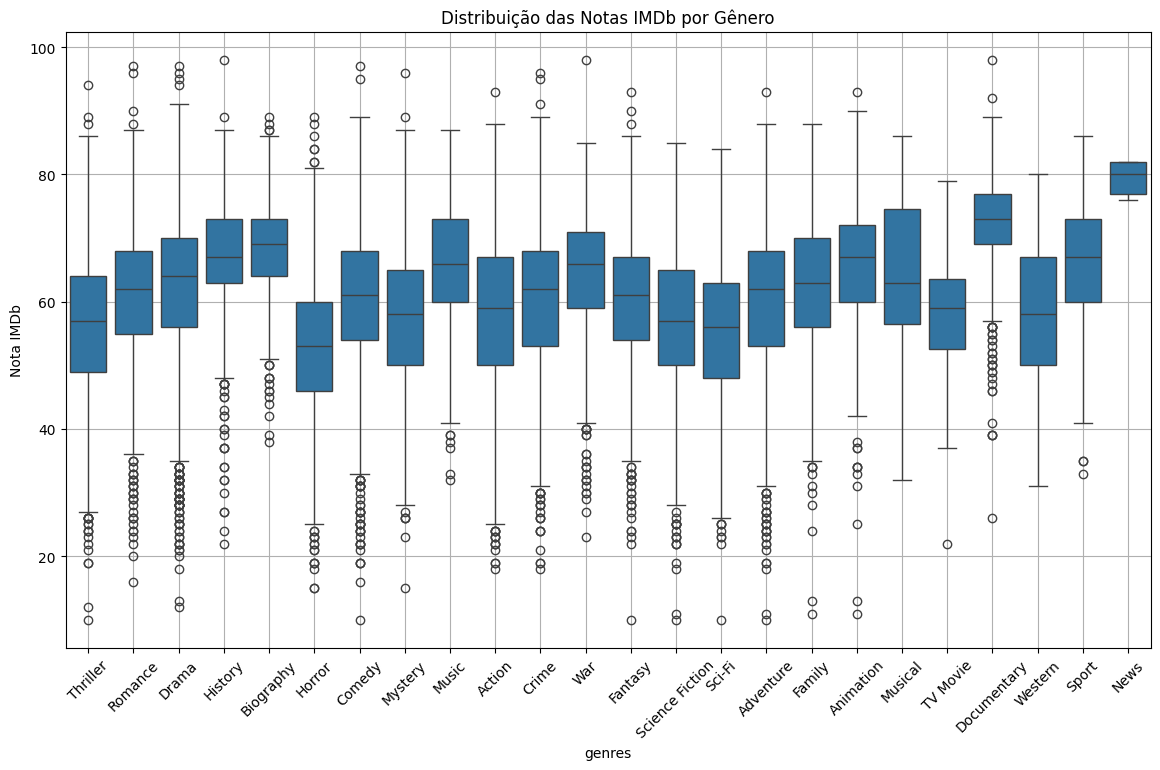

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_clean, x='genres', y='imdb')
plt.title("Distribuição das Notas IMDb por Gênero")
plt.ylabel("Nota IMDb")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

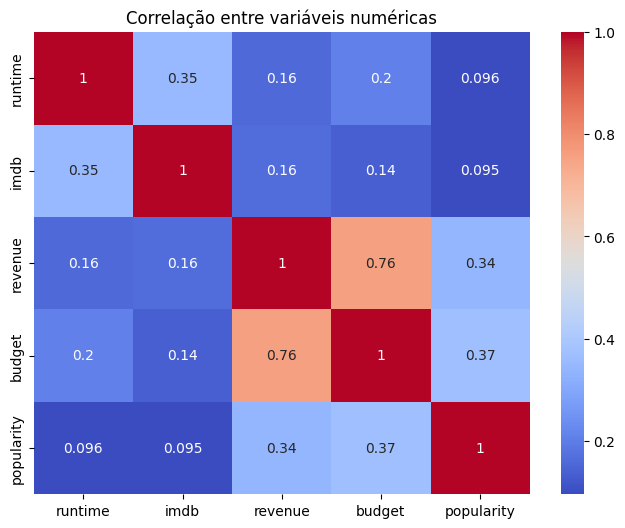

In [ ]:
numeric_cols = ['runtime', 'imdb', 'revenue', 'budget', 'popularity']
correlation = df_clean[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlação entre variáveis numéricas")
plt.show()

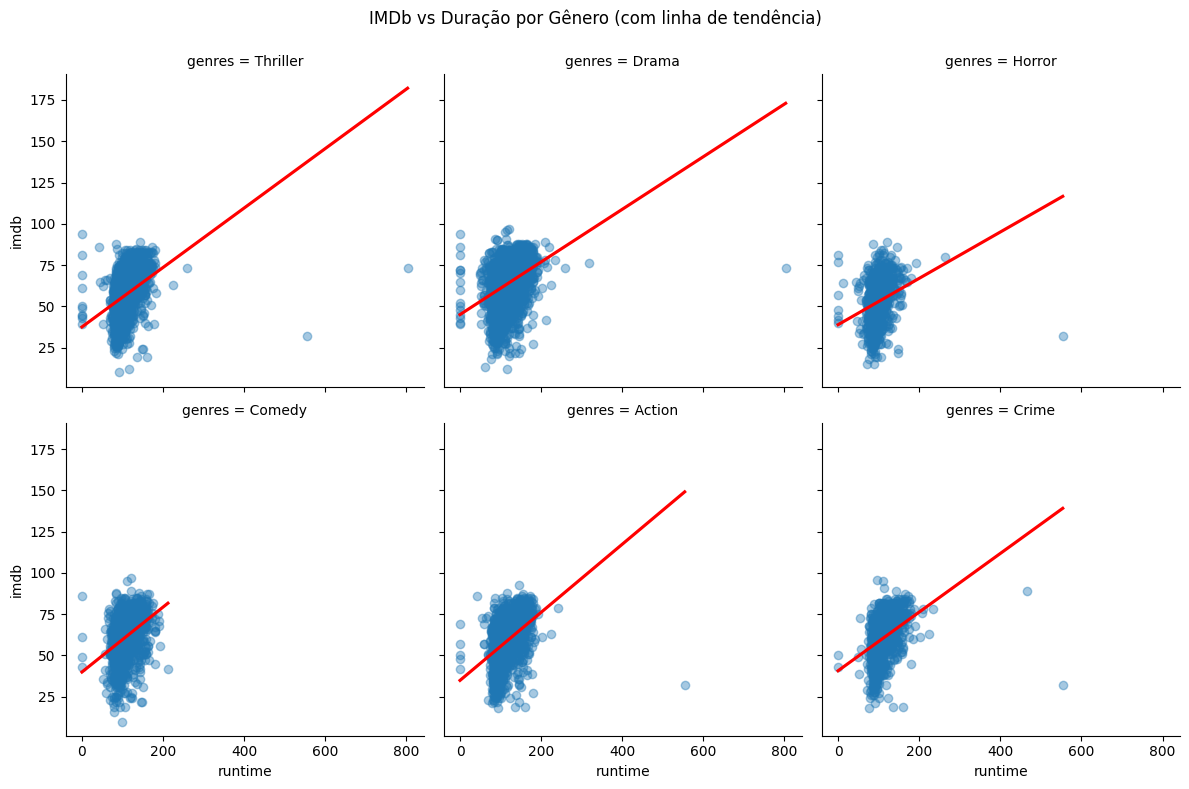

In [ ]:
df_clean = df_exploded.dropna(subset=['runtime', 'imdb'])

# Exemplo com apenas alguns gêneros (para visualização mais clara)
top_genres = df_clean['genres'].value_counts().head(6).index
df_filtered = df_clean[df_clean['genres'].isin(top_genres)]

# Gráfico com regressão linear por gênero
sns.lmplot(
    data=df_filtered,
    x='runtime',
    y='imdb',
    col='genres',
    col_wrap=3,
    height=4,
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'},
    ci=None
)
plt.subplots_adjust(top=0.9)
plt.suptitle("IMDb vs Duração por Gênero (com linha de tendência)")
plt.show()

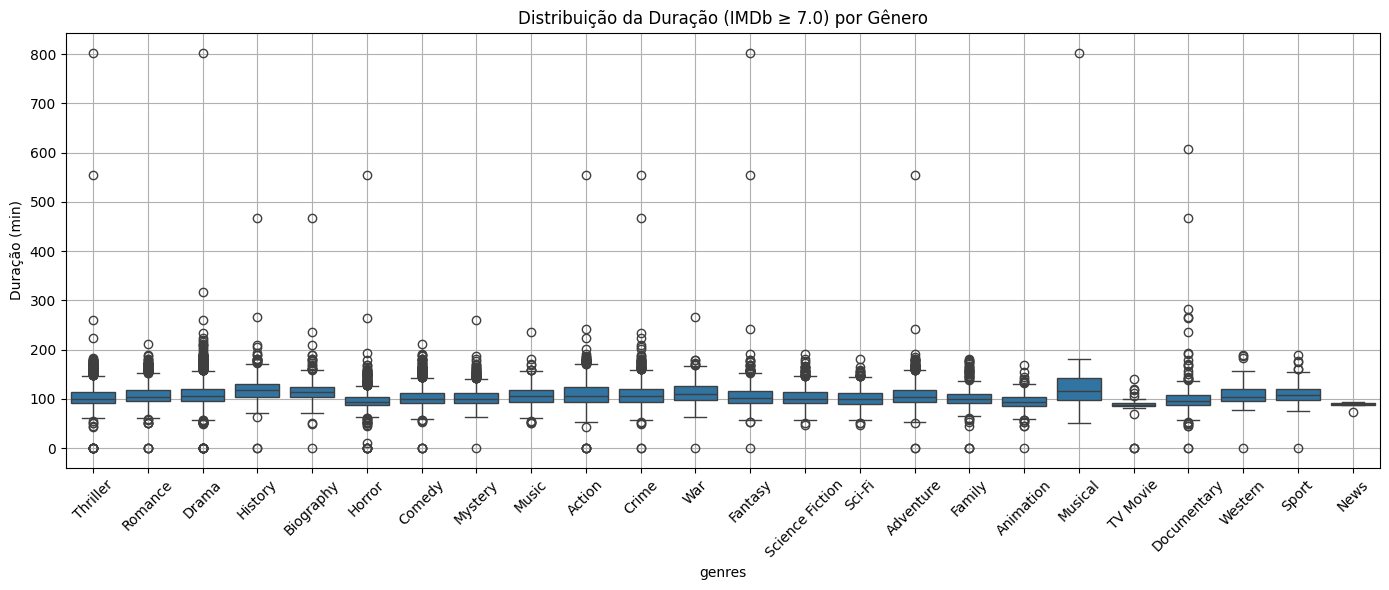

In [ ]:
high_rated = df_clean[df_clean['imdb'] >= 7.0]

plt.figure(figsize=(14, 6))
sns.boxplot(data=high_rated, x='genres', y='runtime')
plt.title("Distribuição da Duração (IMDb ≥ 7.0) por Gênero")
plt.ylabel("Duração (min)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

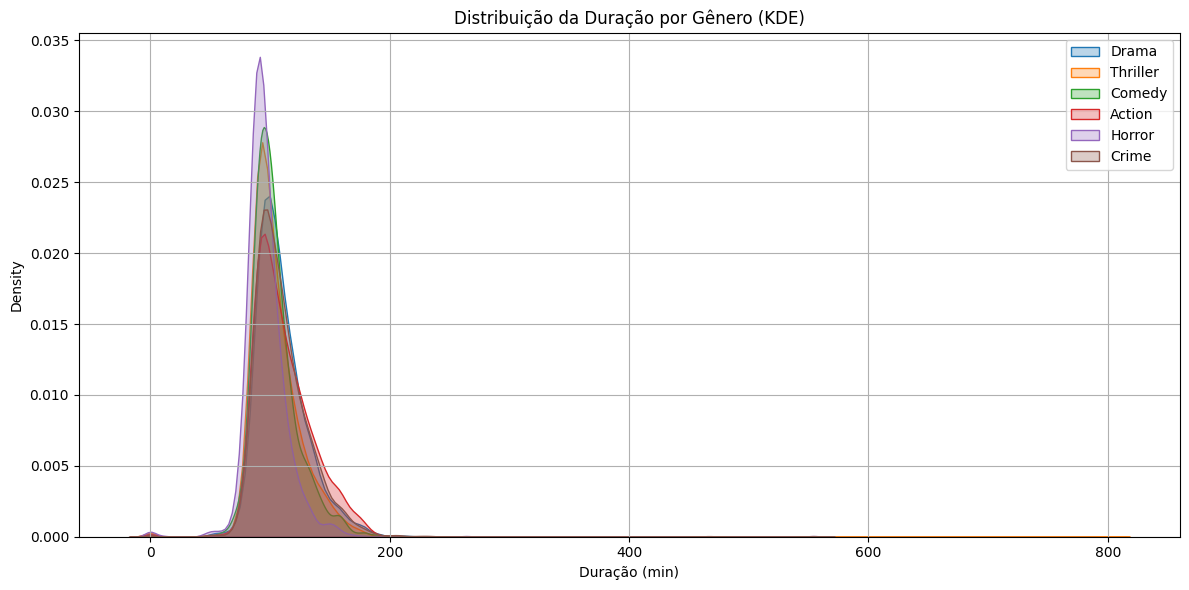

In [ ]:
plt.figure(figsize=(12, 6))

for genre in top_genres:
    subset = df_clean[df_clean['genres'] == genre]
    sns.kdeplot(subset['runtime'], label=genre, fill=True, alpha=0.3)

plt.title("Distribuição da Duração por Gênero (KDE)")
plt.xlabel("Duração (min)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


-------------------------------------------------------------------------------


In [ ]:
genre_counts = df_clean['genres'].value_counts()

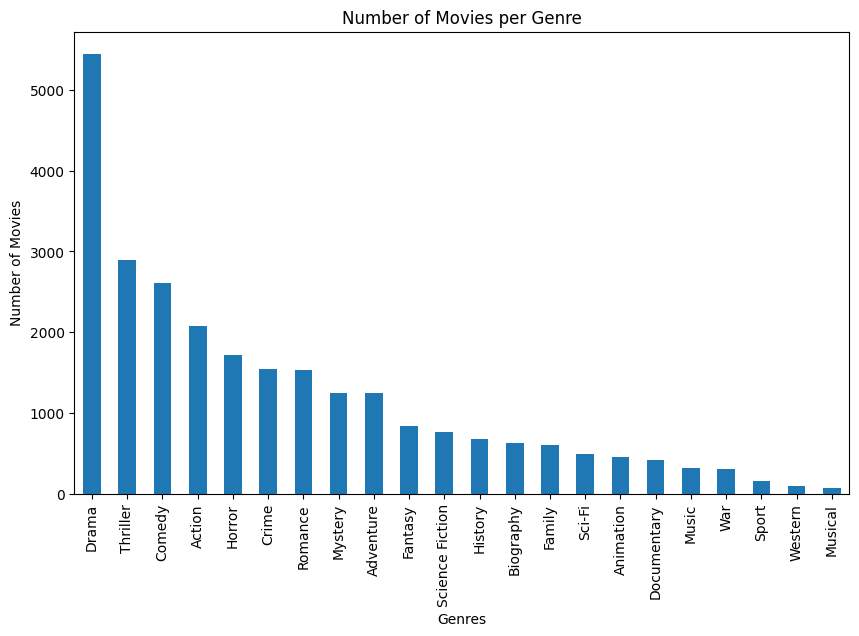

In [ ]:
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar')
plt.title('Number of Movies per Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.show()

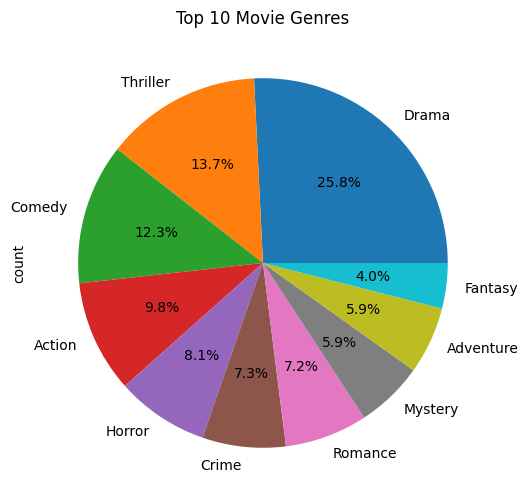

In [ ]:
plt.figure(figsize=(10,6))
genre_counts[:10].plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Movie Genres')
plt.show()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26105 entries, 0 to 9661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            26105 non-null  int64  
 1   id                    26105 non-null  object 
 2   Title                 26105 non-null  object 
 3   Year                  26105 non-null  int64  
 4   BoxOffice             9360 non-null   object 
 5   Production            159 non-null    object 
 6   budget                26105 non-null  int64  
 7   genres                26105 non-null  object 
 8   original_language     26105 non-null  object 
 9   popularity            26105 non-null  float64
 10  production_companies  26105 non-null  object 
 11  revenue               26105 non-null  int64  
 12  runtime               26105 non-null  int64  
 13  Metacritic            12882 non-null  float64
 14  imdb                  26105 non-null  float64
 15  rotten                178

In [ ]:
df_exploded_companies = df_clean.explode('production_companies')
production_companies = df_exploded_companies.groupby('production_companies').agg({
    'revenue': 'mean',
    'rotten': 'mean',
    'imdb': 'mean'
}).reset_index()

top_earners_production_companies = production_companies.sort_values(by='revenue', ascending=False).head(10)

<ipython-input-17-202c69b58117>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='production_companies', data=top_earners_production_companies, palette='viridis')


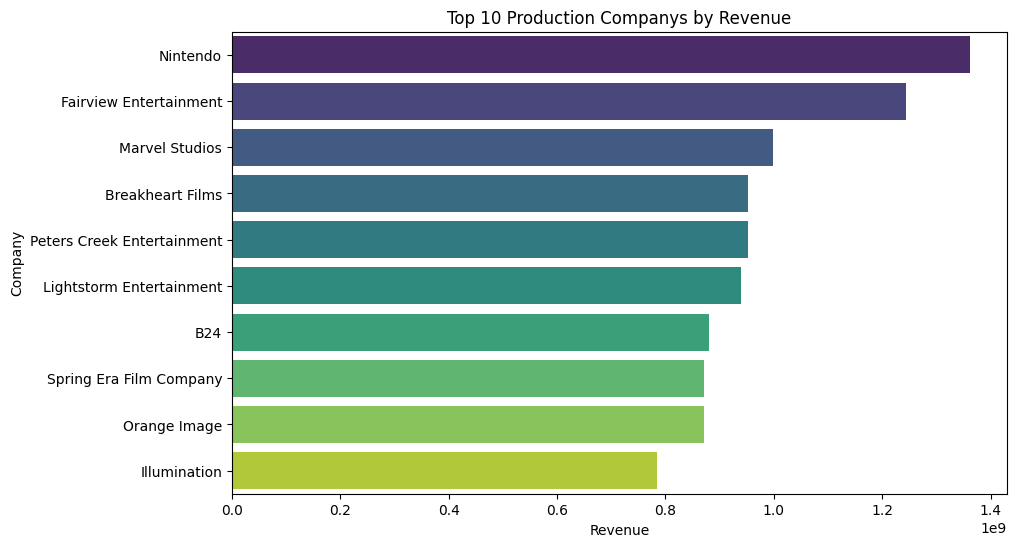

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='revenue', y='production_companies', data=top_earners_production_companies, palette='viridis')
plt.title('Top 10 Production Companys by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Company')
plt.show()

<ipython-input-53-0a6cd3a99f18>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rotten', y='production_companies', data=top_rated_production_companies, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarn

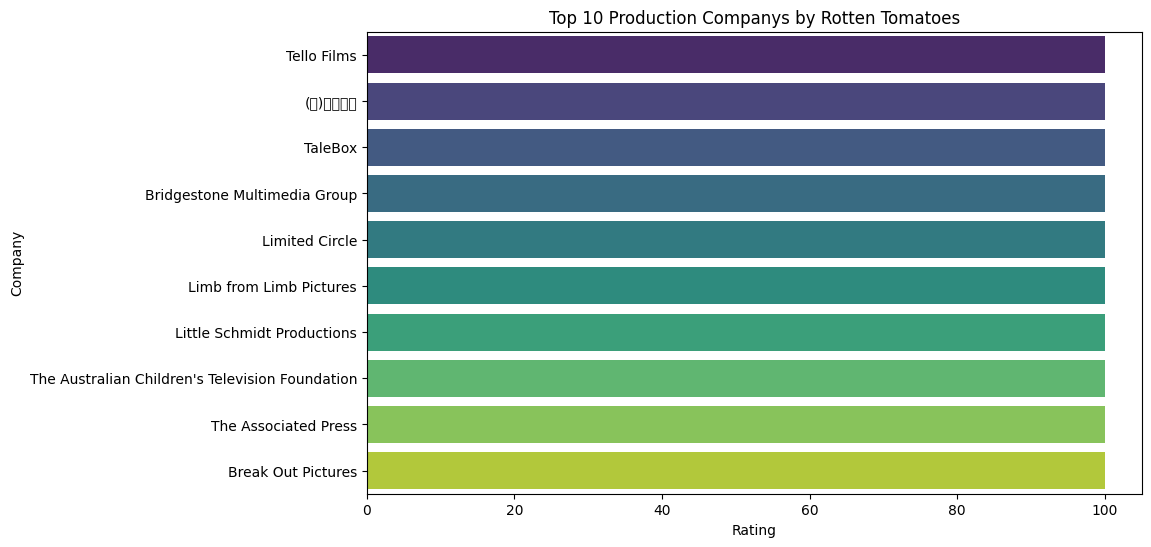

In [ ]:
top_rated_production_companies = production_companies.sort_values(by='rotten', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='rotten', y='production_companies', data=top_rated_production_companies, palette='viridis')
plt.title('Top 10 Production Companys by Rotten Tomatoes')
plt.xlabel('Rating')
plt.ylabel('Company')
plt.show()

<ipython-input-23-e24240366e59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='genres', data=genre_financial_data, palette='viridis')


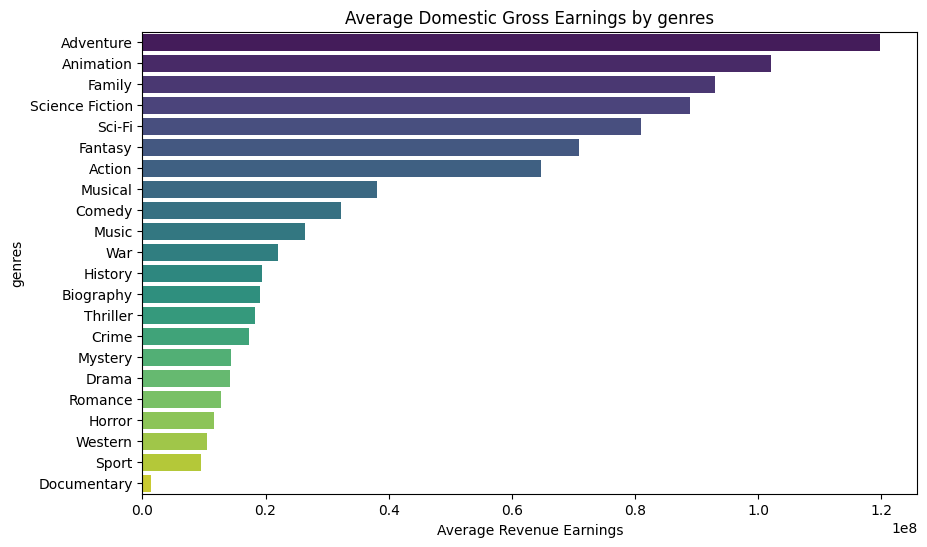

In [ ]:
genre_financial_data = df_clean.groupby('genres').agg({
    'revenue': 'mean'}).reset_index()
genre_financial_data = genre_financial_data.sort_values(by='revenue', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='revenue', y='genres', data=genre_financial_data, palette='viridis')
plt.title('Average Domestic Gross Earnings by genres')
plt.xlabel('Average Revenue Earnings')
plt.ylabel('genres')
plt.show()

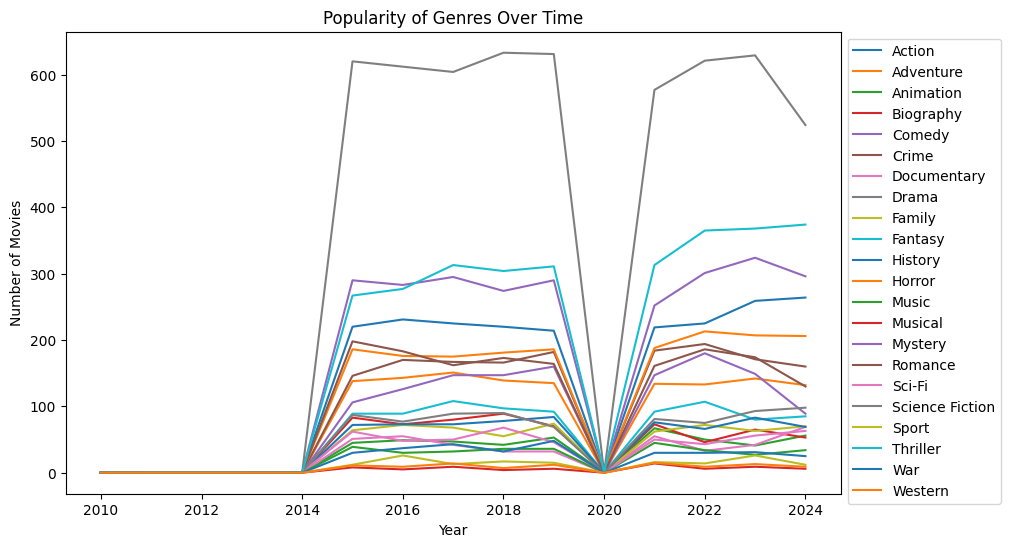

In [ ]:
genre_year_data = df_clean.groupby(['Year', 'genres']).size().reset_index(name='count')
genre_year_pivot = genre_year_data.pivot(index='Year', columns='genres', values='count').fillna(0)
plt.figure(figsize=(10,6))
for genre in genre_year_pivot.columns:
    plt.plot(genre_year_pivot.index, genre_year_pivot[genre], label=genre)
plt.title('Popularity of Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

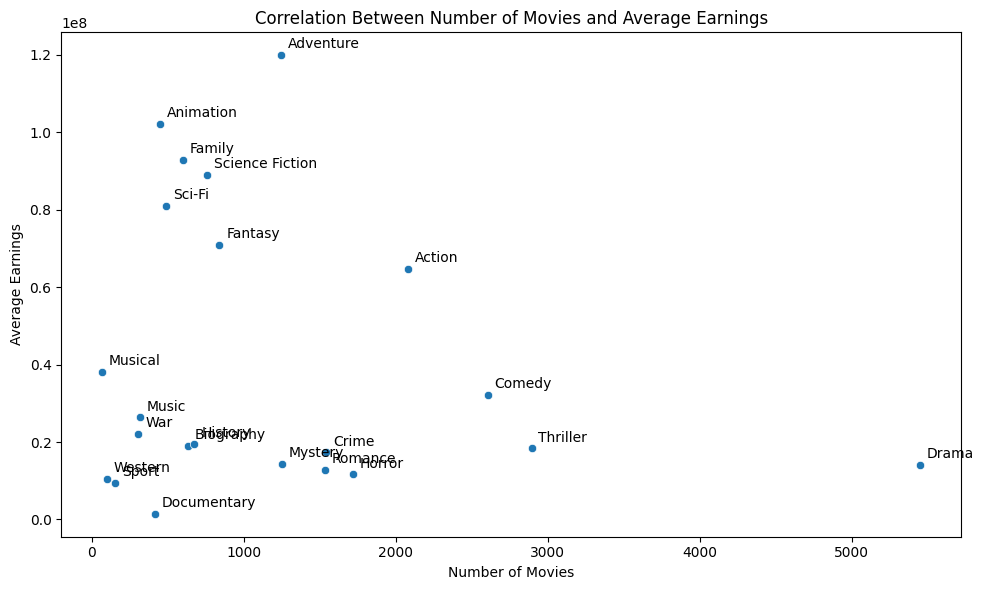

In [ ]:
genre_data = df_clean.groupby('genres').agg({
    'Title': 'count',
    'revenue': 'mean'
}).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Title', y='revenue', data=genre_data)

for i, row in genre_data.iterrows():
    plt.annotate(row['genres'],
                (row['Title'], row['revenue']),
                xytext=(5, 5),
                textcoords='offset points')

plt.title('Number of Movies and Average Earnings')
plt.xlabel('Number of Movies')
plt.ylabel('Average Earnings')
plt.tight_layout()
plt.show()

In [ ]:
# Create bins for movie duration in 10-minute intervals
df['duration_bin'] = (df_clean['runtime'] // 10 * 10).astype(int)

# Calculate mean Rotten Tomatoes rating for each duration bin and genre
duration_ratings = df.groupby(['duration_bin', 'genres'])['rotten'].mean().reset_index()

# Get unique genres and calculate number of subplots needed
genres = df['genres'].unique()
n_genres = len(genres)
n_subplots = (n_genres + 9) // 10  # Round up to nearest 10

# Create multiple subplots
fig, axes = plt.subplots(n_subplots, 1, figsize=(12, 6*n_subplots))
if n_subplots == 1:
    axes = [axes]

for i in range(n_subplots):
    start_idx = i * 10
    end_idx = min((i + 1) * 10, n_genres)
    current_genres = genres[start_idx:end_idx]

    for genre in current_genres:
        genre_data = duration_ratings[duration_ratings['genres'] == genre]
        axes[i].plot(genre_data['duration_bin'],
                    genre_data['rotten'],
                    marker='o',
                    label=genre)

    axes[i].set_title(f'Rotten Tomatoes Ratings by Movie Duration (Genres {start_idx+1}-{end_idx})')
    axes[i].set_xlabel('Movie Duration (minutes)')
    axes[i].set_ylabel('Average Rotten Tomatoes Rating')

    # Set x-axis ticks every 10 minutes
    min_duration = int(df['runtime'].min() // 10 * 10)
    max_duration = int(df['runtime'].max() // 10 * 10 + 10)
    axes[i].set_xticks(np.arange(min_duration, max_duration, 10))
    axes[i].tick_params(axis='x', rotation=45)

    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

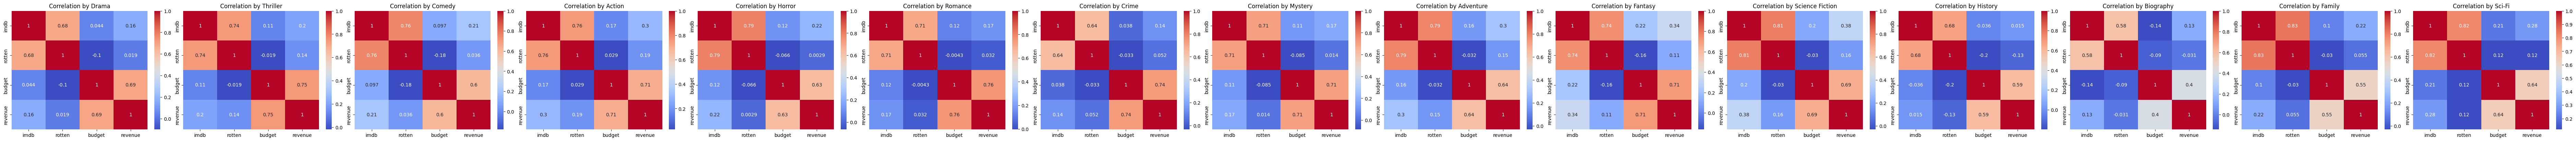

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
ff = df[(df['revenue'] > 0) & (df['budget'] > 0) & (df['Year'].apply(int) > 2020)]

most_used_genres = list(df.explode('genres')['genres'].value_counts().head(15).index)

n = len(most_used_genres)

fig, axes = plt.subplots(1, n, figsize=(5 * n, 4), constrained_layout=True)

for i, genre in enumerate(most_used_genres):
  filtered = ff[ff['genres'].apply(lambda x: genre in x)]

  numeric_cols = ['imdb', 'rotten', 'budget', 'revenue']
  correlation = filtered[numeric_cols].corr()

  plt.figure(figsize=(8, 6))
  ax = axes[i]
  ax.set_title(f'Correlation by {genre}')
  sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=ax)

plt.suptitle(f'Correlation by genre After 2020')
plt.show()
